케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 hidden layer의 수 4, 8,16,32,64 : 46개 클래스에 적용하기 위하여32개정도

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

len(train_data), len(test_data)

#train_data[5]

(8982, 2246)

In [2]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 3.6630 - accuracy: 0.2195 - val_loss: 3.4187 - val_accuracy: 0.2970
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 3.1679 - accuracy: 0.3312 - val_loss: 2.9324 - val_accuracy: 0.3590
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 2.6491 - accuracy: 0.3802 - val_loss: 2.4838 - val_accuracy: 0.3890
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 2.2221 - accuracy: 0.4128 - val_loss: 2.1624 - val_accuracy: 0.4070
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 1.8930 - accuracy: 0.4498 - val_loss: 1.8987 - val_accuracy: 0.5700
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 1.6035 - accuracy: 0.6295 - val_loss: 1.6984 - val_accuracy: 0.5880
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 1.4076 - accuracy: 0.6452 - val_loss: 1.6006 - val_accuracy: 0.6080
Epoch 8/20
16

C:\Users\PC\AppData\Local\Temp\ipykernel_2724\2841500642.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
C:\Users\PC\AppData\Local\Temp\ipykernel_2724\2841500642.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', color='blue')


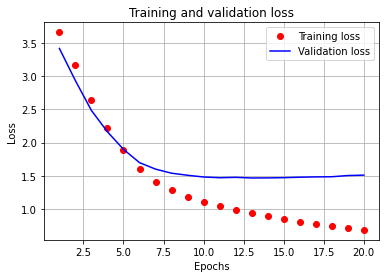

C:\Users\PC\AppData\Local\Temp\ipykernel_2724\2841500642.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Training acc', color='grey')
C:\Users\PC\AppData\Local\Temp\ipykernel_2724\2841500642.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation acc', color='purple')


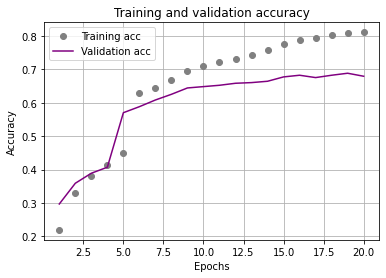

In [5]:
import matplotlib.pyplot as plt


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

plt.clf()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc', color='grey')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='purple')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [7]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 3.6727 - accuracy: 0.0224 - val_loss: 3.4747 - val_accuracy: 0.1790
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 3.2555 - accuracy: 0.3509 - val_loss: 3.0164 - val_accuracy: 0.4020
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 2.7033 - accuracy: 0.4330 - val_loss: 2.4537 - val_accuracy: 0.4360
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 2.1147 - accuracy: 0.4826 - val_loss: 1.9649 - val_accuracy: 0.5360
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 1.6623 - accuracy: 0.6382 - val_loss: 1.6391 - val_accuracy: 0.6590
Epoch 6/20
16/16 [==============================] - 0s 27ms/step - loss: 1.3439 - accuracy: 0.7170 - val_loss: 1.4318 - val_accuracy: 0.6970
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 1.1282 - accuracy: 0.7571 - val_loss: 1.3161 - val_accuracy: 0.7180
Epoch 8/20
16

In [9]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 3.6412 - accuracy: 0.2210 - val_loss: 3.3420 - val_accuracy: 0.3590
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 2.9357 - accuracy: 0.4975 - val_loss: 2.4931 - val_accuracy: 0.6380
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 2.0466 - accuracy: 0.6833 - val_loss: 1.7448 - val_accuracy: 0.6840
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 1.4270 - accuracy: 0.7283 - val_loss: 1.3840 - val_accuracy: 0.7170
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 1.1166 - accuracy: 0.7702 - val_loss: 1.2298 - val_accuracy: 0.7460
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.9279 - accuracy: 0.8103 - val_loss: 1.1404 - val_accuracy: 0.7690
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.7867 - accuracy: 0.8401 - val_loss: 1.0811 - val_accuracy: 0.7810
Epoch 8/20
16

In [10]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 37ms/step - loss: 3.3318 - accuracy: 0.4065 - val_loss: 2.7285 - val_accuracy: 0.5060
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 2.2365 - accuracy: 0.5803 - val_loss: 1.8741 - val_accuracy: 0.6140
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.5494 - accuracy: 0.6822 - val_loss: 1.4443 - val_accuracy: 0.6830
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 1.1806 - accuracy: 0.7459 - val_loss: 1.2425 - val_accuracy: 0.7270
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.9512 - accuracy: 0.7899 - val_loss: 1.1266 - val_accuracy: 0.7590
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.7772 - accuracy: 0.8294 - val_loss: 1.0506 - val_accuracy: 0.7750
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.6380 - accuracy: 0.8639 - val_loss: 0.9900 - val_accuracy: 0.7960
Epoch 8/20
16

In [11]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 39ms/step - loss: 3.2865 - accuracy: 0.4226 - val_loss: 2.5775 - val_accuracy: 0.5520
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 2.0317 - accuracy: 0.6133 - val_loss: 1.6398 - val_accuracy: 0.6350
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.3669 - accuracy: 0.7052 - val_loss: 1.2926 - val_accuracy: 0.7070
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 1.0429 - accuracy: 0.7767 - val_loss: 1.1238 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8193 - accuracy: 0.8274 - val_loss: 1.0197 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6455 - accuracy: 0.8637 - val_loss: 0.9563 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.5117 - accuracy: 0.8903 - val_loss: 0.9179 - val_accuracy: 0.8100
Epoch 8/20
16